In [115]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [116]:
def load_summary(filename):
    dtype=[('FOFID', 'i8'),
           ('MFOF', 'f8'), 
           ('vmax', 'f8'),
           ('x', 'f8'),
           ('y', 'f8'),
           ('z', 'f8'),
           ('vx', 'f8'),
           ('vy', 'f8'),
           ('vz', 'f8')]
    summary = np.loadtxt(filename, dtype=dtype)    
    return summary

In [117]:
galaxy_A = load_summary("../data/mstar_selected/summary_halo_A.txt")
galaxy_B = load_summary("../data/mstar_selected/summary_halo_B.txt")

In [118]:
vel_A = np.sqrt(galaxy_A['vx']**2 + galaxy_A['vy']**2 + galaxy_A['vz']**2)
vel_B = np.sqrt(galaxy_B['vx']**2 + galaxy_B['vy']**2 + galaxy_B['vz']**2)

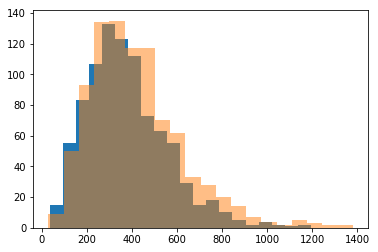

In [119]:
_ = plt.hist(vel_A, bins=20)
_ = plt.hist(vel_B, bins=20, alpha=0.5)

In [180]:
relative_pos = np.sqrt((galaxy_B['x']-galaxy_A['x'])**2+(galaxy_B['y']-galaxy_A['y'])**2+(galaxy_B['z']-galaxy_A['z'])**2)

relative_radial_vel = (galaxy_B['vx']-galaxy_A['vx'])*(galaxy_B['x']-galaxy_A['x'])+\
(galaxy_B['vy']-galaxy_A['vy'])*(galaxy_B['y']-galaxy_A['y'])+\
(galaxy_B['vz']-galaxy_A['vz'])*(galaxy_B['z']-galaxy_A['z'])

relative_radial_vel = relative_radial_vel/relative_pos
print(relative_pos.min()/0.678)
ii = ((galaxy_A['vmax'] < 250) & (galaxy_B['vmax']<250)) & (relative_radial_vel < 0)
jj = ((vel_A > 600) | (vel_B > 600)) & (relative_radial_vel < 0)
print(np.count_nonzero(ii))
print(np.count_nonzero(jj))

699.8892786275962
110
169


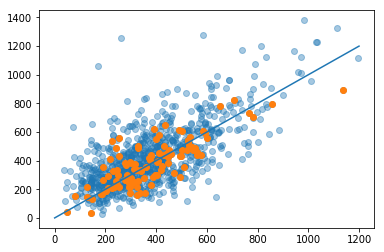

In [181]:
x=np.linspace(0,1200,10)
plt.scatter(vel_A, vel_B, alpha=0.4)
plt.scatter(vel_A[ii], vel_B[ii])
plt.plot(x,x)

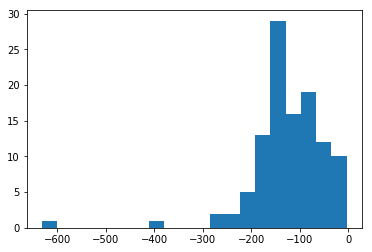

In [182]:
_ = plt.hist(relative_radial_vel[ii], bins=20)

377.7619923811838 164.95218464879937
[234.03446458 346.71021776 525.83909996]


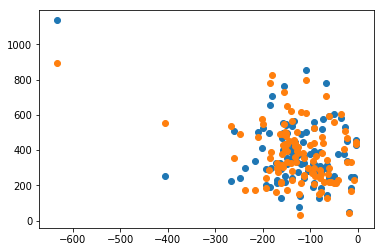

In [183]:
plt.scatter(relative_radial_vel[ii], vel_A[ii])
plt.scatter(relative_radial_vel[ii], vel_B[ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

377.7619923811838 164.95218464879937


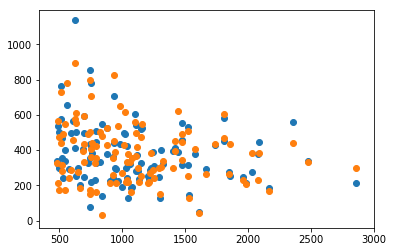

In [184]:
plt.scatter(relative_pos[ii], vel_A[ii])
plt.scatter(relative_pos[ii], vel_B[ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))

In [185]:
print(np.count_nonzero(ii))

110


In [186]:
sorted_vel_A = np.sort(vel_A[ii])
sorted_vel_B = np.sort(vel_B[ii])
integrated = np.linspace(1.0, 0.0, len(sorted_vel_A))

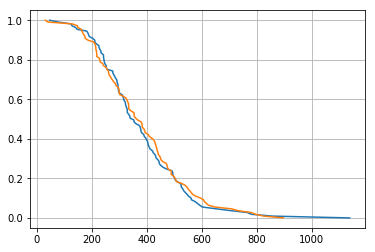

In [187]:
plt.plot(sorted_vel_A, integrated)
plt.plot(sorted_vel_B, integrated)
plt.grid()

In [188]:
sorted_vmax_A = np.sort(galaxy_A['vmax'][jj])
sorted_vmax_B = np.sort(galaxy_B['vmax'][jj])
integrated = np.linspace(1.0, 0.0, len(sorted_vmax_A))

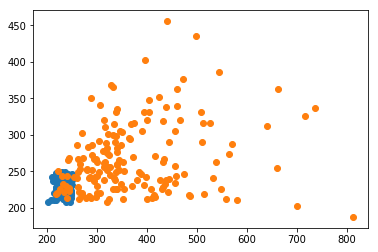

In [196]:
plt.scatter(galaxy_A['vmax'][ii], galaxy_B['vmax'][ii])
plt.scatter(galaxy_A['vmax'][jj], galaxy_B['vmax'][jj])

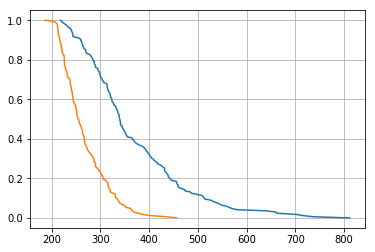

In [189]:
plt.plot(sorted_vmax_A, integrated)
plt.plot(sorted_vmax_B, integrated)
plt.grid()

In [190]:
sorted_mfof_A = np.sort(galaxy_A['MFOF'][jj])
sorted_mfof_B = np.sort(galaxy_B['MFOF'][jj])
integrated = np.linspace(1.0, 0.0, len(sorted_mfof_A))

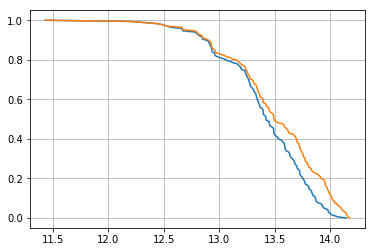

In [191]:
plt.plot(np.log10(sorted_mfof_A)+10, integrated)
plt.plot(np.log10(sorted_mfof_B)+10, integrated)
plt.grid()